### kaggle: https://www.kaggle.com/arindam235/startup-investments-crunchbase

In [53]:
import helper as hm
from helper import *

In [54]:
seed = 14

In [55]:
# magic
%matplotlib inline

# warnings
import warnings
warnings.filterwarnings(action='ignore')

# basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

# other libraries
import pydotplus
from numpy import loadtxt
from xgboost import XGBClassifier
from IPython.display import Image  
from imblearn.ensemble import BalancedRandomForestClassifier 
from imblearn.datasets import make_imbalance

# sci-kit learn libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.feature_selection import rfe
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.externals.six import StringIO  

In [56]:
df = pd.read_csv('investments_VC.csv', encoding='ISO-8859-2')

In [57]:
df.dropna(inplace=True)

In [58]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [59]:
df['round_total'] = 0

In [60]:
for i in range(len(df)):
    df['round_total'][i]=np.sum([df.round_A[i],df.round_B[i],df.round_C[i],df.round_D[i],df.round_E[i],df.round_F[i],df.round_G[i],df.round_H[i]])

In [61]:
# df.drop(['round_A','round_B','round_C','round_D','round_E','round_F','round_G','round_H'],axis=1,inplace=True)

In [62]:
df['market']=df[' market ']
df.drop(['permalink','homepage_url','name','category_list',' funding_total_usd ',' market ','secondary_market'],axis=1,inplace=True)

In [63]:
df['founding_year_month'] = None

In [64]:
df.founded_month=pd.to_datetime(df.founded_month)

In [65]:
for i in range(len(df)):
    df.founded_month[i] = int(str(df.founded_month[i]).split()[0][5:7])

In [66]:
for i in range(len(df)):
    df.founding_year_month[i] = f'{df.founded_month[i]}/{int(df.founded_year[i])}'

In [67]:
df.drop('founded_at',axis=1,inplace=True)

In [68]:
status_dict = {'closed':0,'operating':1,'acquired':2}
df.status = df.status.map(lambda x: status_dict[x])

In [69]:
for i in range(len(df)):
    df.first_funding_at[i] = f'{str(df.first_funding_at[i]).split()[0][5:7]}/{str(df.first_funding_at[i]).split()[0][0:4]}'

In [70]:
for i in range(len(df)):
    df.last_funding_at[i] = f'{str(df.last_funding_at[i]).split()[0][5:7]}/{str(df.last_funding_at[i]).split()[0][0:4]}'

In [71]:
for i in range(len(df)):
    if df.product_crowdfunding[i] > 0:
        df.product_crowdfunding[i] = 1
    else:
        df.product_crowdfunding[i] = 0

In [72]:
for i in range(len(df)):
    if df.post_ipo_debt[i] > 0:
        df.post_ipo_debt[i] = 1
    else:
        df.post_ipo_debt[i] = 0

In [73]:
for i in range(len(df)):
    if df.post_ipo_equity[i] > 0:
        df.post_ipo_equity[i] = 1
    else:
        df.post_ipo_equity[i] = 0

In [74]:
for i in range(len(df)):
    if df.private_equity[i] > 0:
        df.private_equity[i] = 1
    else:
        df.private_equity[i] = 0

In [75]:
for i in range(len(df)):
    if df.grant[i] > 0:
        df.grant[i] = 1
    else:
        df.grant[i] = 0

In [76]:
for i in range(len(df)):
    if df.undisclosed[i] > 0:
        df.undisclosed[i] = 1
    else:
        df.undisclosed[i] = 0

In [77]:
for i in range(len(df)):
    if df.equity_crowdfunding[i] > 0:
        df.equity_crowdfunding[i] = 1
    else:
        df.equity_crowdfunding[i] = 0

In [78]:
for i in range(len(df)):
    if df.angel[i] > 0:
        df.angel[i] = 1
    else:
        df.angel[i] = 0

In [79]:
for i in range(len(df)):
    if df.venture[i] > 0:
        df.venture[i] = 1
    else:
        df.venture[i] = 0

In [80]:
for i in range(len(df)):
    if df.convertible_note[i] > 0:
        df.convertible_note[i] = 1
    else:
        df.convertible_note[i] = 0

In [81]:
for i in range(len(df)):
    if df.debt_financing[i] > 0:
        df.debt_financing[i] = 1
    else:
        df.debt_financing[i] = 0

In [82]:
for feature in ['round_total','round_A','round_B','round_C','round_D','round_E','round_F','round_G','round_H']:
    for i in range(len(df)):
        if df[feature][i] > 0:
            df[feature][i] = 1
        else:
            df[feature][i] = 0

In [83]:
for i in range(len(df)):
    if df.seed[i] > 0:
        df.seed[i] = 'seed_money'
    else:
        df.seed[i] = 'no_seed'

In [84]:
cat_list = ['country_code','city','state_code','region','founded_month','founded_quarter','first_funding_at',
           'last_funding_at','seed','market','founding_year_month']

In [85]:
df_cat=df[cat_list]

In [86]:
for col in cat_list:
    df_cat = hm.create_encoding(col,df_cat,df,'status')

In [87]:
df.drop(cat_list,axis=1,inplace=True)

In [88]:
for col in df_cat:
    df[col]=df_cat[col]

In [89]:
print(df.shape)
df.head()

(21840, 34)


,status,funding_rounds,founded_year,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,...,city,state_code,region,founded_month,founded_quarter,first_funding_at,last_funding_at,seed,market,founding_year_month
0,2,1.0,2012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.047694,1.038643,1.039618,1.019058,1.011416,1.052434,1.093878,1.006539,1.057803,1.000000
1,1,1.0,2010.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.894737,1.022071,0.904762,1.058379,0.996294,1.006601,1.006079,1.062364,1.063249,1.001689
2,1,1.0,1986.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.984496,1.077914,1.027205,1.058379,1.085714,1.019512,1.058394,1.062364,1.009960,1.088235
3,1,1.0,1984.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.000000,1.023739,1.020761,1.058379,1.095238,1.065789,1.094118,1.062364,1.009960,1.095238
4,1,4.0,2001.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.000000,1.061047,1.088608,1.058379,1.142180,1.025000,1.023256,1.062364,1.003180,1.139364


<Figure size 432x288 with 0 Axes>

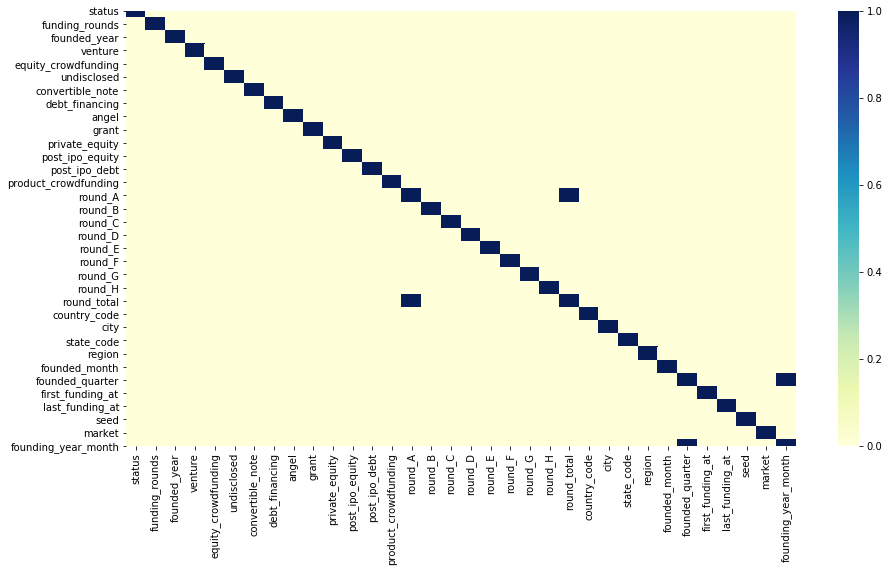

In [90]:
plt.tight_layout()
plt.figure(figsize=(15,8))
sns.heatmap(df.corr()>=0.7,cmap="YlGnBu")

In [91]:
df.drop(['round_total','founded_quarter'],axis=1,inplace=True)

In [92]:
df.status.value_counts()

1    18448
2     2202
0     1190
Name: status, dtype: int64

In [93]:
X = df.drop('status',axis=1)
y = df.status

In [94]:
rfc = RandomForestClassifier(random_state=seed)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(8), scoring='accuracy',min_features_to_select=15)
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=8, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=14,
                                       verbose=0, warm_start=False),
      min_features_to_select=15, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [95]:
support_list = list(rfecv.support_)

In [96]:
importance = []
for val, sup in list(zip(X.columns,support_list)):
    if sup == True:
        importance.append(val)

In [97]:
print(X[importance].shape)
X[importance].head()

(21840, 20)


,funding_rounds,founded_year,venture,debt_financing,angel,private_equity,round_A,round_B,round_C,round_D,country_code,city,state_code,region,founded_month,first_funding_at,last_funding_at,seed,market,founding_year_month
0,1.0,2012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.046829,1.047694,1.038643,1.039618,1.019058,1.052434,1.093878,1.006539,1.057803,1.000000
1,1.0,2010.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.046829,0.894737,1.022071,0.904762,1.058379,1.006601,1.006079,1.062364,1.063249,1.001689
2,1.0,1986.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.046829,0.984496,1.077914,1.027205,1.058379,1.019512,1.058394,1.062364,1.009960,1.088235
3,1.0,1984.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.046829,1.000000,1.023739,1.020761,1.058379,1.065789,1.094118,1.062364,1.009960,1.095238
4,4.0,2001.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.046829,1.000000,1.061047,1.088608,1.058379,1.025000,1.023256,1.062364,1.003180,1.139364


In [98]:
X = X[importance]

In [99]:
scaler = MinMaxScaler()
for col in X.columns:
    X[col] = scaler.fit_transform(X[[col]])

In [100]:
X, y = make_imbalance(X,y, sampling_strategy = {0:1190,1:1190,2:1190})

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=seed,test_size=0.25)

## Training scores

84.98



<Figure size 432x288 with 0 Axes>

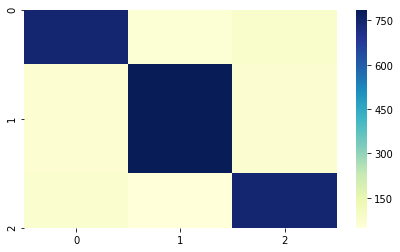

In [114]:
XGB = XGBClassifier(colsample_bytree=0.3, gamma=0.4, max_depth=9, min_child_weight=3, n_estimators=28)
XGB.fit(X_train, y_train)
Y_pred = XGB.predict(X_train)
acc_log = round(XGB.score(X_train, y_train) * 100, 2)
print(acc_log)
print('')
plt.tight_layout()
plt.figure(figsize=(7,4))
(sns.heatmap(confusion_matrix(y_train, Y_pred),cmap="YlGnBu"))

## Testing scores

67.19



<Figure size 432x288 with 0 Axes>

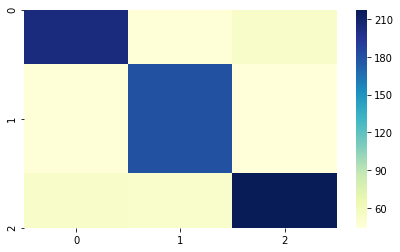

In [113]:
XGB = XGBClassifier(colsample_bytree=0.3, gamma=0.4, max_depth=9, min_child_weight=3, n_estimators=28)
XGB.fit(X_train, y_train)
Y_pred = XGB.predict(X_test)
acc_log = round(XGB.score(X_test, y_test) * 100, 2)
print(acc_log)
print('')
plt.tight_layout()
plt.figure(figsize=(7,4))
(sns.heatmap(confusion_matrix(y_test, Y_pred),cmap="YlGnBu"))

In [120]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
score = rf.score(X_test,y_test)

In [124]:
a = pd.DataFrame(rf.feature_importances_).T
a.columns = X.columns

In [128]:
importance_of_features = a.T.sort_values(by=0,ascending=False)
importance_of_features

,0
city,0.136771
last_funding_at,0.132139
first_funding_at,0.125323
market,0.114302
founding_year_month,0.097078
founded_year,0.091089
region,0.062228
state_code,0.050772
funding_rounds,0.046455
founded_month,0.039249
